Vamos a estudiar como se puede realizar la reducción del conjunto de entrenamiento al 50% de la mejor manera posible.  
Las opciones que se barajan son:  
* Uso de KMeans para localizar representantes de cada clase.  
* Uso de KMedioids para lo mismo, pero ahora los representantes son elementos del conjunto directamente.  
* Uso de gausianas, buscar los puntos más average posible al hacer el ajuste de los valores a gausianas.  
 

In [36]:
import numpy as np
import matplotlib.pyplot as plt  
import os 
from sklearn.cluster import KMeans 
from sklearn_extra.cluster import KMedoids  
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

from scipy.spatial.distance import cdist

# Gausianas

Vamos a ver como funciona cada uno de los algoritmos, primero el de las **Gausianas**.

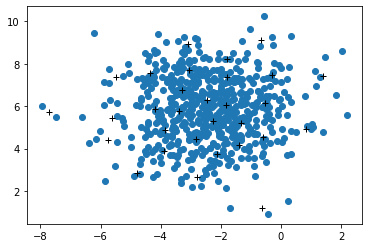

In [34]:
modelgaus=GaussianMixture(n_components=30)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelgaus.fit(data[0])
plt.scatter(data[0][:,0],data[0][:,1])
plt.plot(modelgaus.means_[:,0],modelgaus.means_[:,1],"+k")

Como vemos, si usamos las gausianas para escoger los representantes, tenemos que tener cuidado por que realmente las medias no serán los mejores representantes, quizá lo mas indicado sería tomar varias gausianas (pero pocas) y escoger los valores mas cercanos a las medias.  


In [137]:
def get_closer_points(medias,data,n):
    # a esta funcion le pasamos las posiciones de los puntos y de las medias,
    # y nos devuelve un vector logico diciendo que n puntos son los mas cercanos a las medias
    #las distancias entre las medias y los puntos son 
    distancias=cdist(medias,data)

    #y queremos solo nos n puntos mas cercanos a cualquiera de estas
    #primero los juntamos pero guardando donde deben ser separados
    leng=distancias.shape[1]
    aux_dists=np.concatenate(distancias,axis=0)
    indices_aux_dist=np.argsort(aux_dists)
    #ahora queremos un vector de boleanos que nos diga cuales son los que vamos a considerar
    aux_bool=np.full(( indices_aux_dist.shape[-1]), False, dtype=bool)
    aux_bool[indices_aux_dist[:n]]=True
    # y le volvemos a dar la forma
    aux_bool=aux_bool.reshape(-1,leng)

    #por ultimo lo coloreamos escogemos si esta cerca de cualquiera de las medias, entonces hacermo sentancia or/any
    #para la dimension 1
    points_represent=np.any(aux_bool,axis=0) #el axis este no lo entiendo...
    return points_represent

50


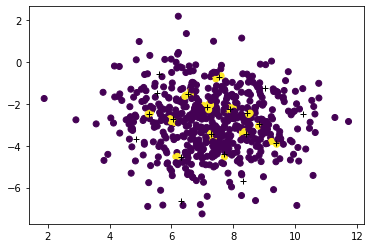

In [138]:
modelgaus=GaussianMixture(n_components=20)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelgaus.fit(data[0])

points_represent=get_closer_points(modelgaus.means_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelgaus.means_[:,0],modelgaus.means_[:,1],"+k")

Vemos como lo mejor no es coger tantas gausianas como representantes, sino coger unas pocas gausianas, pero los representantes mas cercanos las medias de estas.  

50
50
50
295


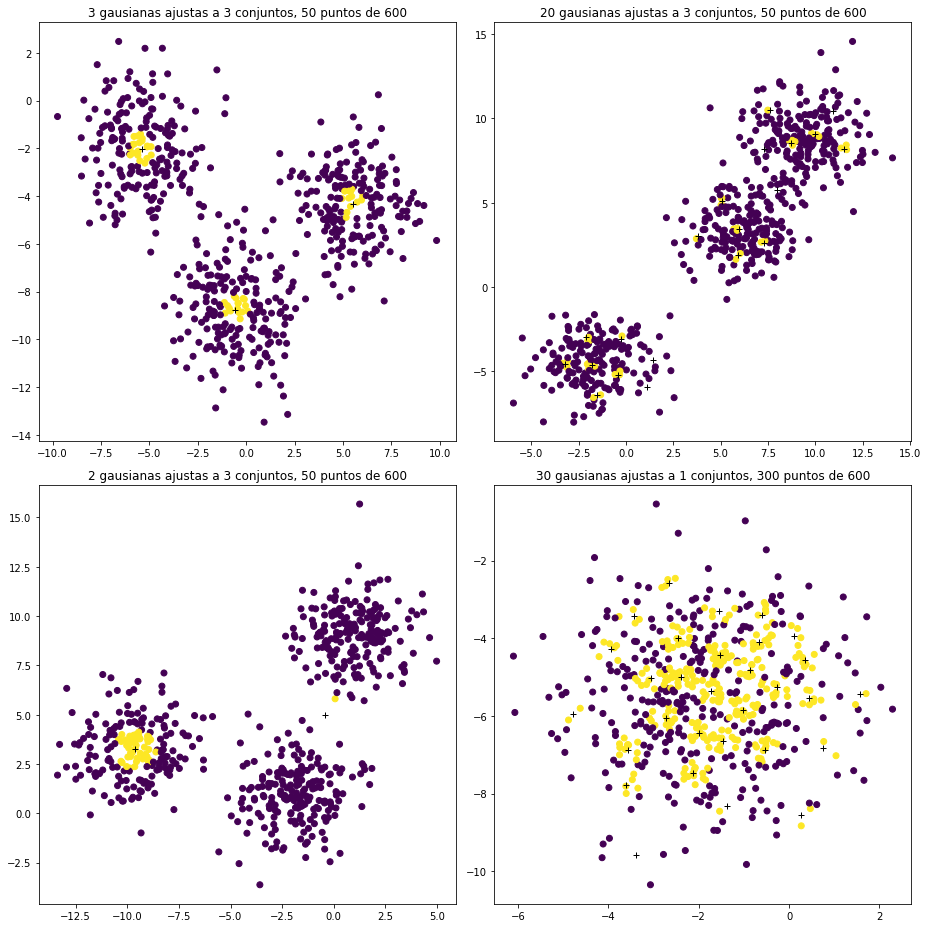

In [139]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
modelgaus=GaussianMixture(n_components=3)
data=make_blobs(600,centers=3,cluster_std=1.5)
modelgaus.fit(data[0])
points_represent=get_closer_points(modelgaus.means_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelgaus.means_[:,0],modelgaus.means_[:,1],"+k")
plt.title("3 gausianas ajustas a 3 conjuntos, 50 puntos de 600")

plt.subplot(2,2,2)
modelgaus=GaussianMixture(n_components=20)
data=make_blobs(600,centers=3,cluster_std=1.5)
modelgaus.fit(data[0])
points_represent=get_closer_points(modelgaus.means_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelgaus.means_[:,0],modelgaus.means_[:,1],"+k")
plt.title("20 gausianas ajustas a 3 conjuntos, 50 puntos de 600")

plt.subplot(2,2,3)
modelgaus=GaussianMixture(n_components=2)
data=make_blobs(600,centers=3,cluster_std=1.5)
modelgaus.fit(data[0])
points_represent=get_closer_points(modelgaus.means_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelgaus.means_[:,0],modelgaus.means_[:,1],"+k")
plt.title("2 gausianas ajustas a 3 conjuntos, 50 puntos de 600")

plt.subplot(2,2,4)
modelgaus=GaussianMixture(n_components=30)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelgaus.fit(data[0])
points_represent=get_closer_points(modelgaus.means_,data[0],n=300)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelgaus.means_[:,0],modelgaus.means_[:,1],"+k")
plt.title("30 gausianas ajustas a 1 conjuntos, 300 puntos de 600")

plt.tight_layout()

Se da el caso que algunos puntos son los mas cercanos a dos centros de modo que al final ese se cuenta como dos representantes y terminamos con menos representantes de los que deberiamos, este error se puede arreglar limitando a cada punto como un solo representante, pero esto solo será un problema para cuando el numero de gausianas es muy alto y estas están muy cerca, el cual no va a ser nuestro caso, por lo  que lo dejamos como está.

# KMeans  
Ahora usamos Kmeans, pero tratamos estos centros de la misma forma que hemos hecho con las medias de las gausianas

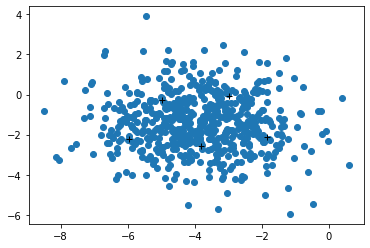

In [147]:
modelmeans=KMeans(n_clusters=5)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelmeans.fit(data[0])
plt.scatter(data[0][:,0],data[0][:,1])
plt.plot(modelmeans.cluster_centers_[:,0],modelmeans.cluster_centers_[:,1],"+k")

50


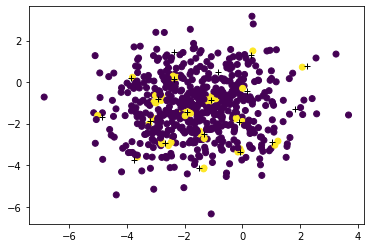

In [149]:
modelmeans=KMeans(n_clusters=20)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelmeans.fit(data[0])

points_represent=get_closer_points(modelmeans.cluster_centers_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelmeans.cluster_centers_[:,0],modelmeans.cluster_centers_[:,1],"+k")

50
50
50
298


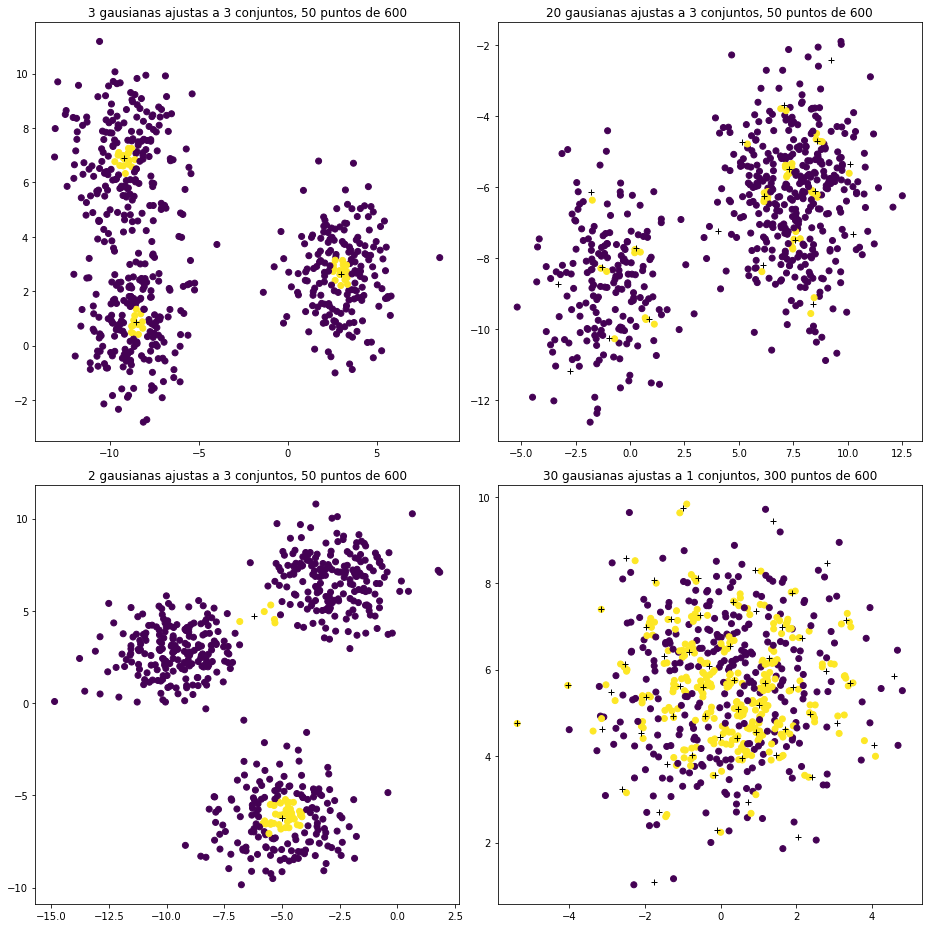

In [153]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
modelmeans=KMeans(n_clusters=3)
data=make_blobs(600,centers=3,cluster_std=1.5)
modelmeans.fit(data[0])
points_represent=get_closer_points(modelmeans.cluster_centers_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelmeans.cluster_centers_[:,0],modelmeans.cluster_centers_[:,1],"+k")
plt.title("3 centros ajustan a 3 conjuntos, 50 puntos de 600")

plt.subplot(2,2,2)
modelmeans=KMeans(n_clusters=20)
data=make_blobs(600,centers=3,cluster_std=1.5)
modelmeans.fit(data[0])
points_represent=get_closer_points(modelmeans.cluster_centers_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelmeans.cluster_centers_[:,0],modelmeans.cluster_centers_[:,1],"+k")
plt.title("20 centros ajustan a 3 conjuntos, 50 puntos de 600")

plt.subplot(2,2,3)
modelmeans=KMeans(n_clusters=2)
data=make_blobs(600,centers=3,cluster_std=1.5)
modelmeans.fit(data[0])
points_represent=get_closer_points(modelmeans.cluster_centers_,data[0],n=50)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelmeans.cluster_centers_[:,0],modelmeans.cluster_centers_[:,1],"+k")
plt.title("2 centros ajustan a 3 conjuntos, 50 puntos de 600")

plt.subplot(2,2,4)
modelmeans=KMeans(n_clusters=60)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelmeans.fit(data[0])
points_represent=get_closer_points(modelmeans.cluster_centers_,data[0],n=300)
print(sum(points_represent))
plt.scatter(data[0][:,0],data[0][:,1],c=points_represent)
plt.plot(modelmeans.cluster_centers_[:,0],modelmeans.cluster_centers_[:,1],"+k")
plt.title("30 centros ajustan 1 conjunto, 300 puntos de 600")

plt.tight_layout()

Volvemos a tener el problema con el tema de que un representante se cuente dos veces, pero es solo para el caso en que escogemos demasiados centros.  

Los resultados son muy similares al de las gausianas.  

# KMedioids

Ahora directamente vamos a obtener puntos como representantes/centros. 

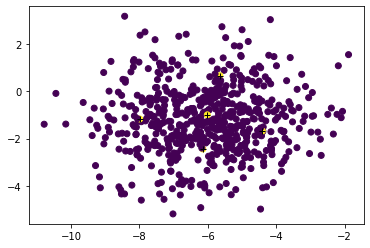

In [162]:
modelmedoids=KMedoids(n_clusters=5)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelmedoids.fit(data[0])

color_aux=np.full(data[0].shape[0],False,dtype=bool)
color_aux[modelmedoids.medoid_indices_]=True
plt.scatter(data[0][:,0],data[0][:,1],c=color_aux)
plt.plot(modelmedoids.cluster_centers_[:,0],modelmedoids.cluster_centers_[:,1],"+k")

Igual no estamos escogiendo los mejores representantes, si bien estos deben tener diversidad, puede que esa mejor escoger mas representantes del centro, pues estos son mas promedio que el resto.  

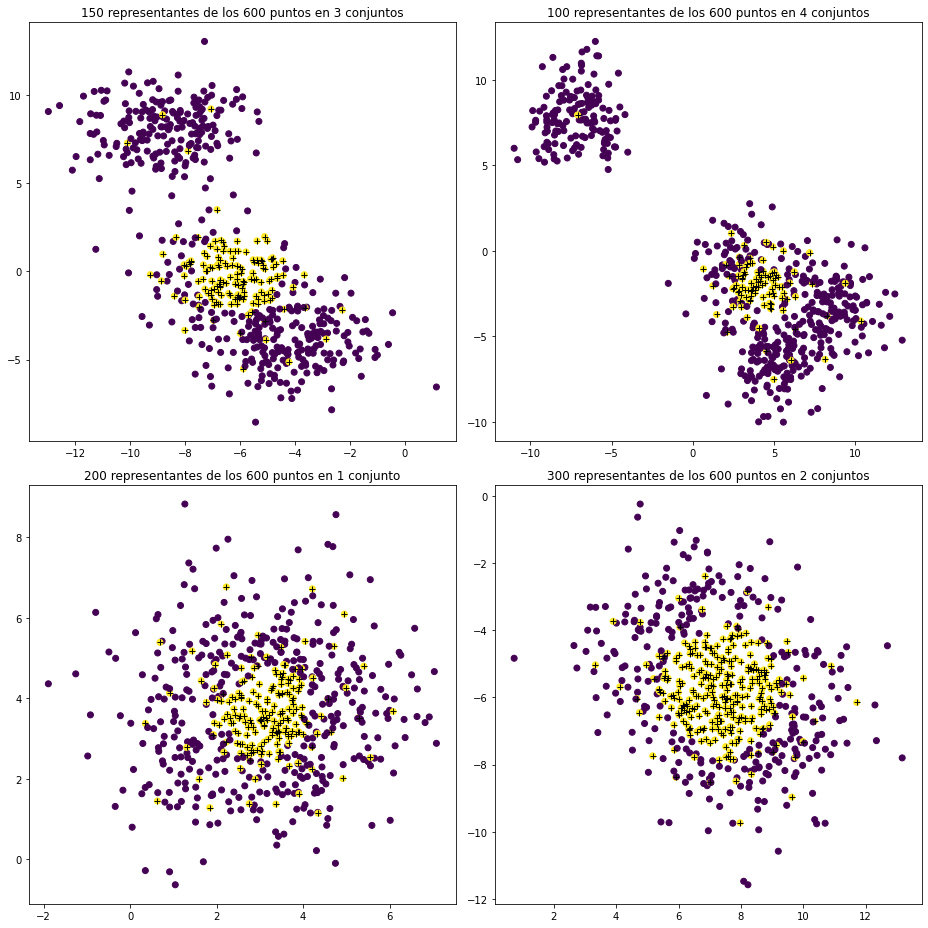

In [167]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
modelmedoids=KMedoids(n_clusters=150)
data=make_blobs(600,centers=3,cluster_std=1.5)
modelmedoids.fit(data[0])

color_aux=np.full(data[0].shape[0],False,dtype=bool)
color_aux[modelmedoids.medoid_indices_]=True
plt.scatter(data[0][:,0],data[0][:,1],c=color_aux)
plt.plot(modelmedoids.cluster_centers_[:,0],modelmedoids.cluster_centers_[:,1],"+k")
plt.title("150 representantes de los 600 puntos en 3 conjuntos")




plt.subplot(2,2,2)
modelmedoids=KMedoids(n_clusters=100)
data=make_blobs(600,centers=4,cluster_std=1.5)
modelmedoids.fit(data[0])

color_aux=np.full(data[0].shape[0],False,dtype=bool)
color_aux[modelmedoids.medoid_indices_]=True
plt.scatter(data[0][:,0],data[0][:,1],c=color_aux)
plt.plot(modelmedoids.cluster_centers_[:,0],modelmedoids.cluster_centers_[:,1],"+k")
plt.title("100 representantes de los 600 puntos en 4 conjuntos")



plt.subplot(2,2,3)
modelmedoids=KMedoids(n_clusters=200)
data=make_blobs(600,centers=1,cluster_std=1.5)
modelmedoids.fit(data[0])

color_aux=np.full(data[0].shape[0],False,dtype=bool)
color_aux[modelmedoids.medoid_indices_]=True
plt.scatter(data[0][:,0],data[0][:,1],c=color_aux)
plt.plot(modelmedoids.cluster_centers_[:,0],modelmedoids.cluster_centers_[:,1],"+k")
plt.title("200 representantes de los 600 puntos en 1 conjunto")




plt.subplot(2,2,4)
modelmedoids=KMedoids(n_clusters=300)
data=make_blobs(600,centers=2,cluster_std=1.5)
modelmedoids.fit(data[0])

color_aux=np.full(data[0].shape[0],False,dtype=bool)
color_aux[modelmedoids.medoid_indices_]=True
plt.scatter(data[0][:,0],data[0][:,1],c=color_aux)
plt.plot(modelmedoids.cluster_centers_[:,0],modelmedoids.cluster_centers_[:,1],"+k")
plt.title("300 representantes de los 600 puntos en 2 conjuntos")

plt.tight_layout()

La elección usando Kmedioides no parece muy acertada en muchos casos, parece una mejor opción el uso de pocos centros y la eleccion de los puntos por cercanía a dichos puntos .